# 🔧 Step 1: Load and Inspect the Data

      Count breast cancer-related publications per year 📈

            Identify top journals and authors 🧠
 
                  Visualize trends using bar charts and more 🧊

    We’ll start by loading the CSV and taking a look at its structure: columns, missing values, and data types.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"f:\analysis-project\excell\Cancer_Research_Citation_Search_20250411.csv"
df = pd.read_csv(file_path)


      Display basic information about the dataset

In [3]:
basic_info = df.info()

# Display the first 5 rows
head_data = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    1653 non-null   object
 1   Author(s)                1653 non-null   object
 2   Journal                  1653 non-null   object
 3   Fiscal Year              1653 non-null   object
 4   Publication Year         1653 non-null   object
 5   DOI Link                 979 non-null    object
 6   All Authors              1653 non-null   object
 7   Category Topics          1653 non-null   object
 8   Journal Information      1653 non-null   object
 9   Keyword Search Expanded  1653 non-null   object
 10  URL                      1653 non-null   object
 11  Row                      1653 non-null   object
dtypes: object(12)
memory usage: 155.1+ KB


    Show number of missing values per column

In [4]:
missing_values = df.isnull().sum()
missing_values

Title                        0
Author(s)                    0
Journal                      0
Fiscal Year                  0
Publication Year             0
DOI Link                   674
All Authors                  0
Category Topics              0
Journal Information          0
Keyword Search Expanded      0
URL                          0
Row                          0
dtype: int64

    Show the column names

In [5]:
columns = df.columns.tolist()
columns

['Title',
 'Author(s)',
 'Journal',
 'Fiscal Year',
 'Publication Year',
 'DOI Link',
 'All Authors',
 'Category Topics',
 'Journal Information',
 'Keyword Search Expanded',
 'URL',
 'Row']

In [6]:
basic_info, head_data, missing_values, columns

(None,
                                                Title  \
 0  “When I needed it”: Evaluation of the use and ...   
 1  10-year trends in noncommunicable disease mort...   
 2  2019 ASCCP risk-based management consensus gui...   
 3  2019 ASCCP risk-based management consensus gui...   
 4  2020 cancer incidence data in the USA reveal e...   
 
                                            Author(s)  \
 0  Rohan EA, Townsend JS, Fleischmann A, Stahl S,...   
 1  Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...   
 2  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 3  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 4                                      Townsend JS.,   
 
                                   Journal Fiscal Year Publication Year  \
 0             Journal of Cancer Education       2,019            2,018   
 1   Pan American Journal of Public Health       2,019            2,019   
 2  Journal of Lower Genital Tract Disease       2,020            2,020   
 3  J

# 🧹 Step 2: Data Cleaning Plan

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['title', 'author(s)', 'journal', 'fiscal_year', 'publication_year',
       'doi_link', 'all_authors', 'category_topics', 'journal_information',
       'keyword_search_expanded', 'url', 'row'],
      dtype='object')

In [8]:
df['fiscal_year'] = df['fiscal_year'].str.replace(',', '').astype(int)
df['publication_year'] = df['publication_year'].str.replace(',', '').astype(int)
df[['fiscal_year', 'publication_year']]

,fiscal_year,publication_year
0,2019,2018
1,2019,2019
2,2020,2020
3,2024,2024
4,2023,2023
...,...,...
1648,2009,2008
1649,2010,2010
1650,2010,2010
1651,2020,2020


In [9]:
df['doi_link'] = df['doi_link'].fillna('Not Available')
df['doi_link']

0            https://dx.doi.org/10.1007/s13187-017-1178-7
1                https://dx.doi.org/10.26633/RPSP.2019.37
2         https://dx.doi.org/10.1097/LGT.0000000000000525
3         https://dx.doi.org/10.1097/LGT.0000000000000788
4        https://dx.doi.org/10.1016/S1470-2045(23)00337-6
                              ...                        
1648                                        Not Available
1649                                        Not Available
1650                                        Not Available
1651    https://dx.doi.org/10.3768/rtipress.2020.rr.00...
1652             https://dx.doi.org/10.1089/jwh.2016.6140
Name: doi_link, Length: 1653, dtype: object

In [10]:
df.drop(columns=['row', 'keyword_search_expanded'], inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

     Show updated info

In [12]:
cleaned_info = df.info()
head_after_cleaning = df.head()

cleaned_info, head_after_cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 0 to 1652
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1653 non-null   object
 1   author(s)            1653 non-null   object
 2   journal              1653 non-null   object
 3   fiscal_year          1653 non-null   int32 
 4   publication_year     1653 non-null   int32 
 5   doi_link             1653 non-null   object
 6   all_authors          1653 non-null   object
 7   category_topics      1653 non-null   object
 8   journal_information  1653 non-null   object
 9   url                  1653 non-null   object
dtypes: int32(2), object(8)
memory usage: 129.1+ KB


(None,
                                                title  \
 0  “When I needed it”: Evaluation of the use and ...   
 1  10-year trends in noncommunicable disease mort...   
 2  2019 ASCCP risk-based management consensus gui...   
 3  2019 ASCCP risk-based management consensus gui...   
 4  2020 cancer incidence data in the USA reveal e...   
 
                                            author(s)  \
 0  Rohan EA, Townsend JS, Fleischmann A, Stahl S,...   
 1  Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...   
 2  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 3  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 4                                      Townsend JS.,   
 
                                   journal  fiscal_year  publication_year  \
 0             Journal of Cancer Education         2019              2018   
 1   Pan American Journal of Public Health         2019              2019   
 2  Journal of Lower Genital Tract Disease         2020              2020 

In [13]:
df

,title,author(s),journal,fiscal_year,publication_year,doi_link,all_authors,category_topics,journal_information,url
0,“When I needed it”: Evaluation of the use and ...,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Journal of Cancer Education,2019,2018,https://dx.doi.org/10.1007/s13187-017-1178-7,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Breast Cancer,Journal: Journal of Cancer Education (Volume: ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
1,10-year trends in noncommunicable disease mort...,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Pan American Journal of Public Health,2019,2019,https://dx.doi.org/10.26633/RPSP.2019.37,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Health Disparities in Cancer,Journal: Pan American Journal of Public Health...,http://iris.paho.org/xmlui/handle/123456789/50554
2,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,2020,2020,https://dx.doi.org/10.1097/LGT.0000000000000525,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
3,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal of Lower Genital Tract Disease,2024,2024,https://dx.doi.org/10.1097/LGT.0000000000000788,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,https://pubmed.ncbi.nlm.nih.gov/38117563/
4,2020 cancer incidence data in the USA reveal e...,"Townsend JS.,",Lancet Oncology,2023,2023,https://dx.doi.org/10.1016/S1470-2045(23)00337-6,"Townsend JS.,",Breast Cancer,Journal: Lancet Oncology (Volume: 24; Issue: 8...,https://pubmed.ncbi.nlm.nih.gov/37541267/
...,...,...,...,...,...,...,...,...,...,...
1648,Years of potential life lost and productivity ...,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",Cancer,2009,2008,Not Available,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",HPV-Associated Cancers,Journal: Cancer (Volume: 113; Issue: S10; Page...,http://www.ncbi.nlm.nih.gov/pubmed/18980277
1649,Years of potential life lost and productivity ...,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Urology,2010,2010,Not Available,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Prostate Cancer,Journal: Urology (Volume: 76; Issue: 3; Pages:...,http://www.ncbi.nlm.nih.gov/pubmed/20573389
1650,Years of potential life lost caused by prostat...,"Li C, Ekwueme DU.",Cancer Epidemiology,2010,2010,Not Available,"Li C, Ekwueme DU.",Prostate Cancer,Journal: Cancer Epidemiology (Volume: 64; Issu...,http://www.ncbi.nlm.nih.gov/pubmed/20510666
1651,Young breast cancer survivors: Employment expe...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",RTI Press,2020,2020,https://dx.doi.org/10.3768/rtipress.2020.rr.00...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",Breast Cancer,Journal: RTI Press (Volume: ; Issue: ; Pages: ...,https://www.rti.org/rti-press-publication/youn...


In [14]:
# Load the re-uploaded CSV file
file_path = r"f:\analysis-project\excell\Cancer_Research_Citation_Search_20250411.csv"
df = pd.read_csv(file_path)




     Initial cleanup


In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['fiscal_year'] = df['fiscal_year'].str.replace(',', '').astype(int)
df['publication_year'] = df['publication_year'].str.replace(',', '').astype(int)
df['doi_link'] = df['doi_link'].fillna('Not Available')
df.drop(columns=['row', 'keyword_search_expanded'], inplace=True)
df.drop_duplicates(inplace=True)

     Advanced cleanup

In [16]:
text_columns = ['title', 'author(s)', 'journal', 'doi_link', 'all_authors', 'category_topics', 'journal_information', 'url']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

df['journal'] = df['journal'].str.title()
df['category_topics'] = df['category_topics'].str.title()

placeholders = ['n/a', 'na', 'none', 'not available', 'null', 'missing']
for col in ['doi_link', 'url']:
    df[col] = df[col].replace(placeholders, 'Not Available', regex=True)
    df[col] = df[col].apply(lambda x: x if x.startswith('http') else 'Not Available')

df.replace('', np.nan, inplace=True)
df.dropna(subset=['title', 'journal', 'fiscal_year', 'publication_year'], inplace=True)
df.reset_index(drop=True, inplace=True)

     Show cleaned info and preview

In [17]:
final_info = df.info()
preview_cleaned = df.head()

final_info, preview_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1653 non-null   object
 1   author(s)            1653 non-null   object
 2   journal              1653 non-null   object
 3   fiscal_year          1653 non-null   int32 
 4   publication_year     1653 non-null   int32 
 5   doi_link             1653 non-null   object
 6   all_authors          1653 non-null   object
 7   category_topics      1653 non-null   object
 8   journal_information  1653 non-null   object
 9   url                  1653 non-null   object
dtypes: int32(2), object(8)
memory usage: 116.4+ KB


(None,
                                                title  \
 0  “When I needed it”: Evaluation of the use and ...   
 1  10-year trends in noncommunicable disease mort...   
 2  2019 ASCCP risk-based management consensus gui...   
 3  2019 ASCCP risk-based management consensus gui...   
 4  2020 cancer incidence data in the USA reveal e...   
 
                                            author(s)  \
 0  Rohan EA, Townsend JS, Fleischmann A, Stahl S,...   
 1  Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...   
 2  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 3  Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...   
 4                                      Townsend JS.,   
 
                                   journal  fiscal_year  publication_year  \
 0             Journal Of Cancer Education         2019              2018   
 1   Pan American Journal Of Public Health         2019              2019   
 2  Journal Of Lower Genital Tract Disease         2020              2020 

      Filter data for 'Breast Cancer' in category_topics

In [18]:
breast_cancer_df = df[df['category_topics'].str.contains("Breast Cancer", case=False, na=False)]

# Basic statistics
publication_counts_by_year = breast_cancer_df['publication_year'].value_counts().sort_index()
top_journals = breast_cancer_df['journal'].value_counts().head(10)
top_authors = breast_cancer_df['author(s)'].str.split(', ').explode().value_counts().head(10)


      Set plot styles

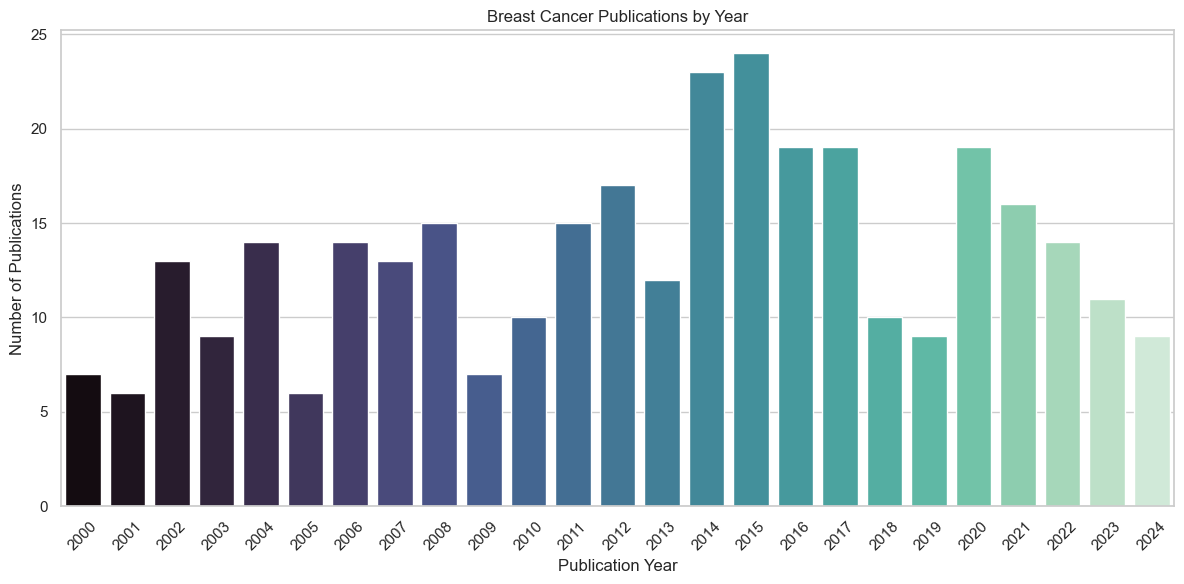

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Breast Cancer Publications by Year')
sns.barplot(x=publication_counts_by_year.index, y=publication_counts_by_year.values, palette="mako")
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

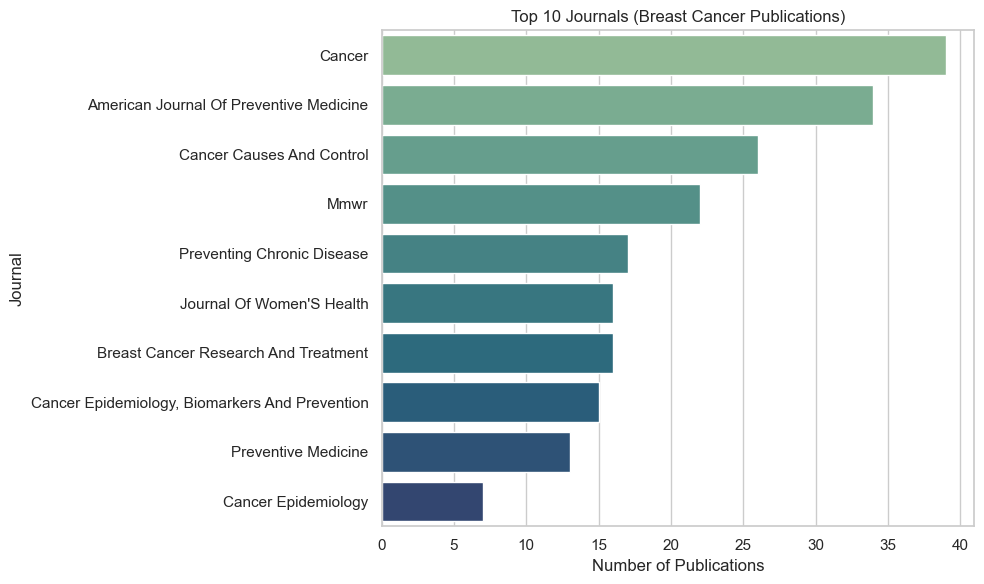

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Journals (Breast Cancer Publications)')
sns.barplot(x=top_journals.values, y=top_journals.index, palette="crest")
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.tight_layout()
plt.show()


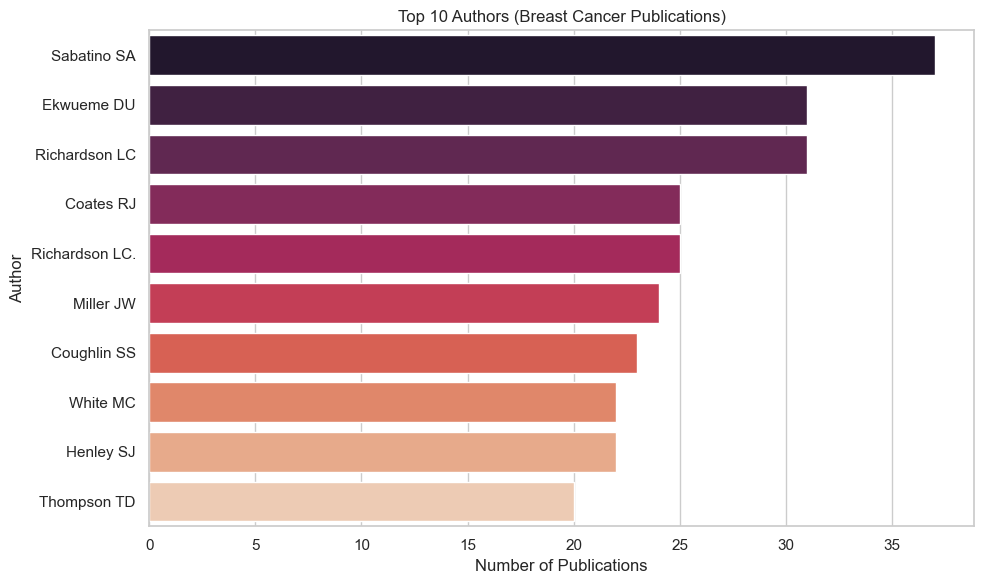

In [21]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Authors (Breast Cancer Publications)')
sns.barplot(x=top_authors.values, y=top_authors.index, palette="rocket")
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

      Show summary counts

In [22]:
breast_cancer_summary = {
    "Total Breast Cancer Publications": len(breast_cancer_df),
    "Years Covered": f"{breast_cancer_df['publication_year'].min()} - {breast_cancer_df['publication_year'].max()}",
    "Unique Journals": breast_cancer_df['journal'].nunique(),
    "Unique Authors (primary listed)": breast_cancer_df['author(s)'].nunique()
}

breast_cancer_summary


{'Total Breast Cancer Publications': 331,
 'Years Covered': '2000 - 2024',
 'Unique Journals': 83,
 'Unique Authors (primary listed)': 324}

In [23]:
summary_df = pd.DataFrame.from_dict(breast_cancer_summary, orient='index', columns=['Value'])
summary_df.reset_index(inplace=True)
summary_df.columns = ['Metric', 'Value']

print(summary_df)


                             Metric        Value
0  Total Breast Cancer Publications          331
1                     Years Covered  2000 - 2024
2                   Unique Journals           83
3   Unique Authors (primary listed)          324


In [24]:
df

,title,author(s),journal,fiscal_year,publication_year,doi_link,all_authors,category_topics,journal_information,url
0,“When I needed it”: Evaluation of the use and ...,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Journal Of Cancer Education,2019,2018,https://dx.doi.org/10.1007/s13187-017-1178-7,"Rohan EA, Townsend JS, Fleischmann A, Stahl S,...",Breast Cancer,Journal: Journal of Cancer Education (Volume: ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
1,10-year trends in noncommunicable disease mort...,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Pan American Journal Of Public Health,2019,2019,https://dx.doi.org/10.26633/RPSP.2019.37,"Razzaghi H, Martin DN, Quesnel-Crooks S, Hong ...",Health Disparities In Cancer,Journal: Pan American Journal of Public Health...,http://iris.paho.org/xmlui/handle/123456789/50554
2,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal Of Lower Genital Tract Disease,2020,2020,https://dx.doi.org/10.1097/LGT.0000000000000525,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
3,2019 ASCCP risk-based management consensus gui...,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Journal Of Lower Genital Tract Disease,2024,2024,https://dx.doi.org/10.1097/LGT.0000000000000788,"Perkins RB, Guido RS, Castle PE, Chelmow D, Ei...",Cervical Cancer,Journal: Journal of Lower Genital Tract Diseas...,https://pubmed.ncbi.nlm.nih.gov/38117563/
4,2020 cancer incidence data in the USA reveal e...,"Townsend JS.,",Lancet Oncology,2023,2023,https://dx.doi.org/10.1016/S1470-2045(23)00337-6,"Townsend JS.,",Breast Cancer,Journal: Lancet Oncology (Volume: 24; Issue: 8...,https://pubmed.ncbi.nlm.nih.gov/37541267/
...,...,...,...,...,...,...,...,...,...,...
1648,Years of potential life lost and productivity ...,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",Cancer,2009,2008,Not Available,"Ekwueme DU, Chesson HW, Zhang KB, Balamurugan A.",Hpv-Associated Cancers,Journal: Cancer (Volume: 113; Issue: S10; Page...,http://www.ncbi.nlm.nih.gov/pubmed/18980277
1649,Years of potential life lost and productivity ...,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Urology,2010,2010,Not Available,"Li C, Ekwueme DU, Rim SH, Tangka FK.",Prostate Cancer,Journal: Urology (Volume: 76; Issue: 3; Pages:...,http://www.ncbi.nlm.nih.gov/pubmed/20573389
1650,Years of potential life lost caused by prostat...,"Li C, Ekwueme DU.",Cancer Epidemiology,2010,2010,Not Available,"Li C, Ekwueme DU.",Prostate Cancer,Journal: Cancer Epidemiology (Volume: 64; Issu...,http://www.ncbi.nlm.nih.gov/pubmed/20510666
1651,Young breast cancer survivors: Employment expe...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",Rti Press,2020,2020,https://dx.doi.org/10.3768/rtipress.2020.rr.00...,"Tangka FKL, Subramanian S, Jones M, Hoover S, ...",Breast Cancer,Journal: RTI Press (Volume: ; Issue: ; Pages: - ),https://www.rti.org/rti-press-publication/youn...
